Import Libraries

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf
import datetime as dt
import plotly.graph_objects as go
from PIL import Image

[*********************100%%**********************]  1 of 1 completed


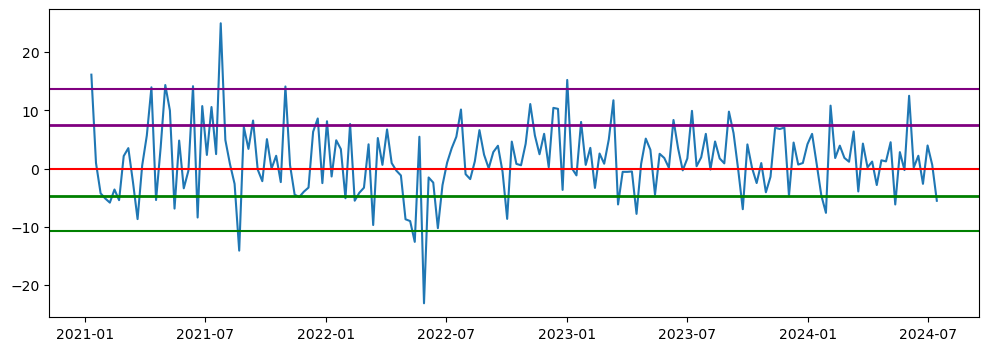

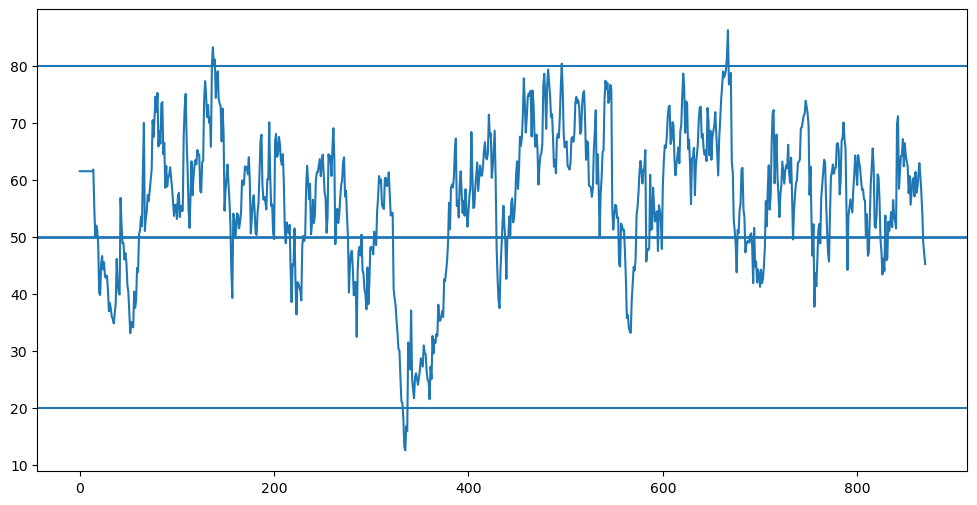

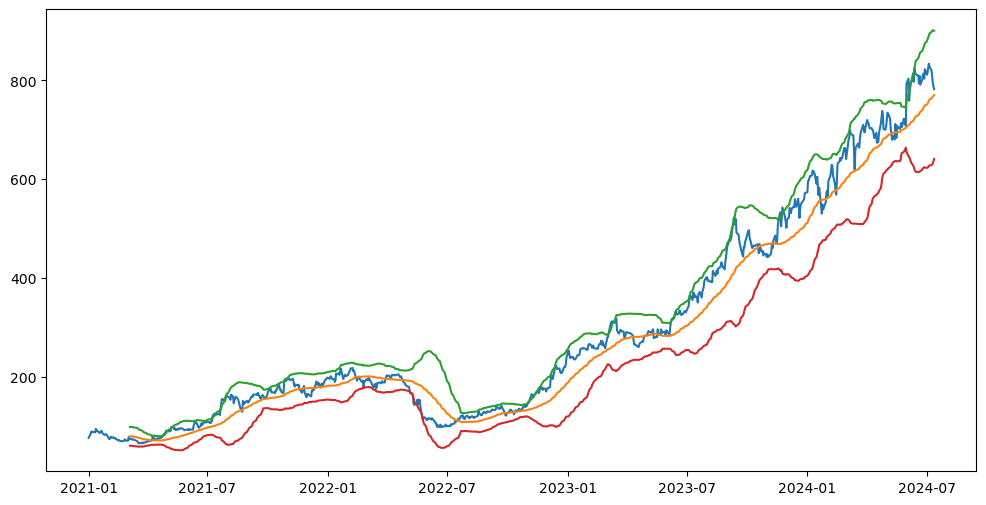

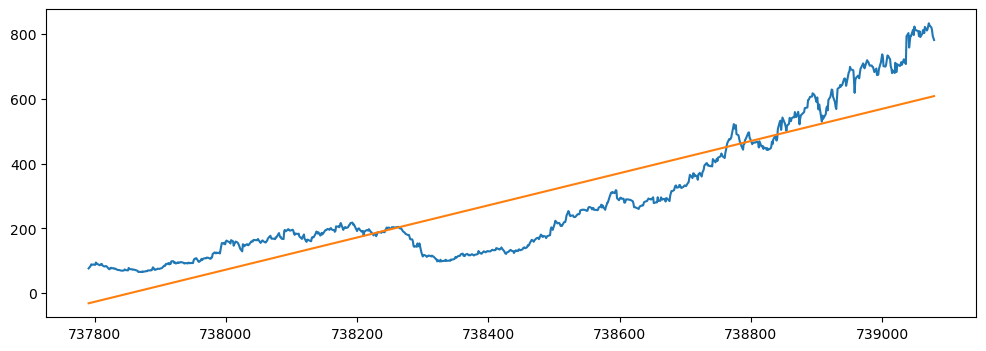

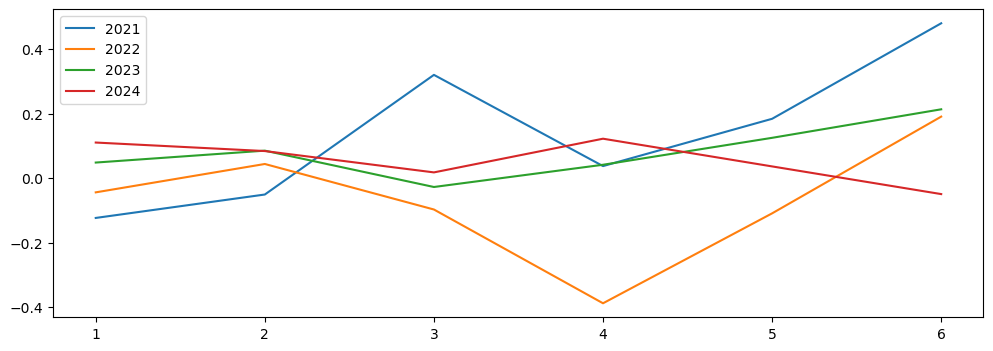

In [153]:
# List of stock
tickers = ['JSL.NS']
for stock in tickers:
    # Ticker = "ICICIBANK.NS"
    start_date = "2021-01-01"
    end_date = "2024-12-31"
    download_data = yf.download(tickers= stock, start=start_date, end=end_date)
    data = pd.DataFrame(download_data['Close'])
    return_final_output(data,stock)
    # plt.savefig(f"../top_50/{stock}.png")
    save_outcome_image(stock)

In [149]:
def save_outcome_image(stock):
    
    Image1 = Image.open(f'../BB/{stock}.png')
    Image2 = Image.open(f'../LR/{stock}.png')
    Image3 = Image.open(f'../MONTHLY_RETURN/{stock}.png')
    Image4 = Image.open(f'../SEASONALITY/{stock}.png')
    Image5 = Image.open(f'../RSI/{stock}.png')
    
    new_image = Image.new('RGBA',size=(1200, 3000))
    new_image.paste(Image1, (0,0))
    new_image.paste(Image2, (0,600))
    new_image.paste(Image3, (0,1200))
    new_image.paste(Image4, (0,1800))
    new_image.paste(Image5, (0,2400))
    new_image.save(f"../top_50/{stock}.png")

In [93]:
Ticker = "ICICIBANK.NS"
start_date = "2021-01-01"
end_date = "2024-12-31"
download_data = yf.download(tickers= Ticker, start=start_date, end=end_date)
data = pd.DataFrame(download_data['Close'])
# data

[*********************100%%**********************]  1 of 1 completed


Load data

In [134]:
def return_final_output(df, ticker):
    a = {}
    a["MONTHLY_RETURN"]= create_monthly_return(df,ticker)
    a['RSI'] = calculate_rsi(ticker, df)
    a['BB'] = create_bb(df, ticker)
    a["LR"] = create_LR(df,ticker) 
    a["SEASONALITY"] = return_seasonality(df,ticker)
    
    return a

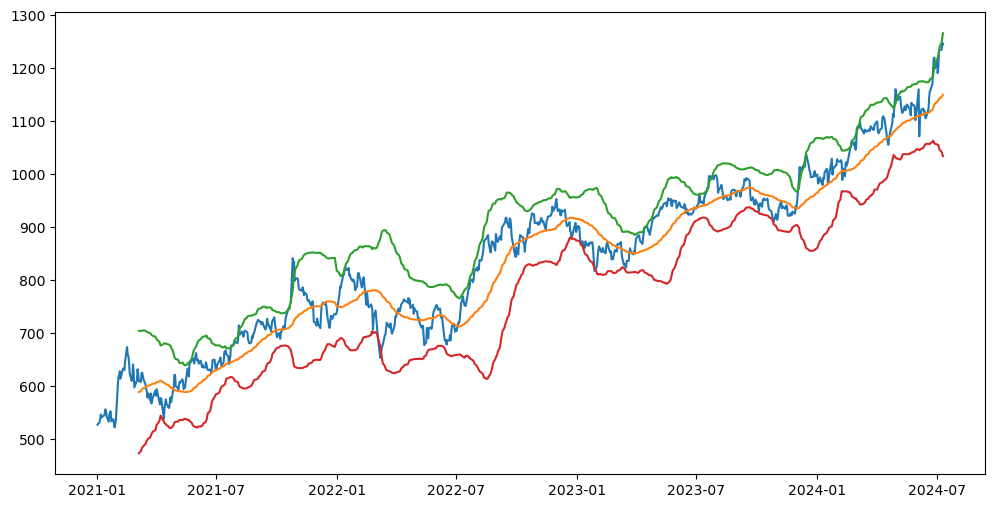

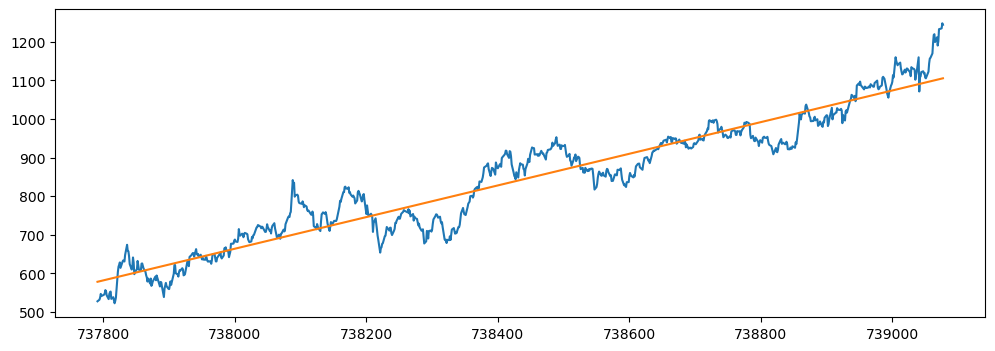

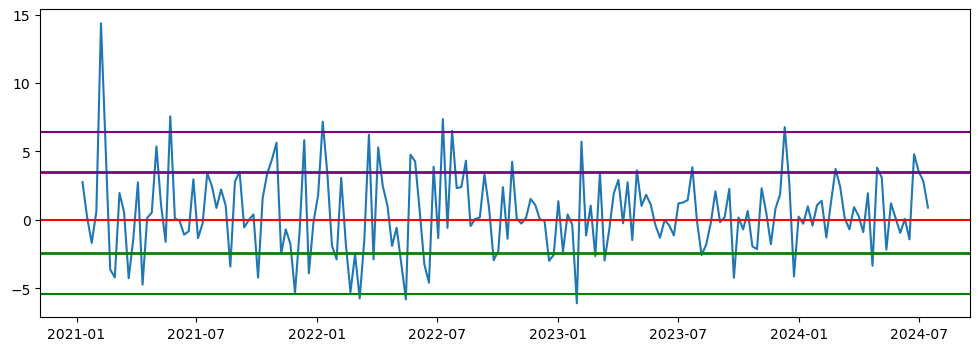

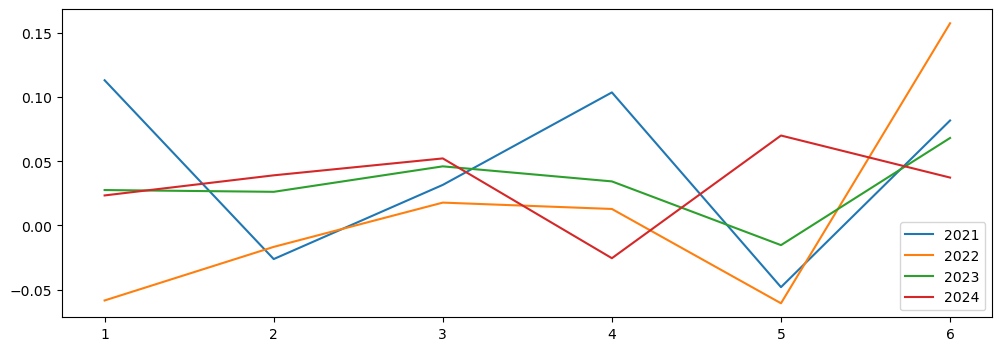

In [95]:
fig = return_final_output(data,"ICICIBANK")
plt.savefig("../top_50/test.png")

In [96]:
# Ticker_list = ["VBL.NS", "ICICIBANK.NS", "RELIANCE.NS"]

# for value in Ticker_list:
#     download_data = yf.download(tickers= Ticker, start=start_date, end=end_date)
#     data = pd.DataFrame(download_data['Close'])
#     return_final_output(data)

Draw 2 Standard Deviation plot

In [97]:
def create_bb(data, ticker):
    data['rolling_mean'] = data['Close'].rolling(45).mean()
    data['rolling_std'] = data['Close'].rolling(45).std()
    data['2UP'] = data['rolling_mean'] + 2.5*data['rolling_std']
    data['2DOWN'] = data['rolling_mean'] - 2.5*data['rolling_std']
    plt.figure(figsize=(12,6))
    plt.plot(data['Close'])
    plt.plot(data['rolling_mean'])
    plt.plot(data['2UP'])
    plt.plot(data['2DOWN'])
    # return fig
    plt.savefig(f"../BB/{ticker}.png")

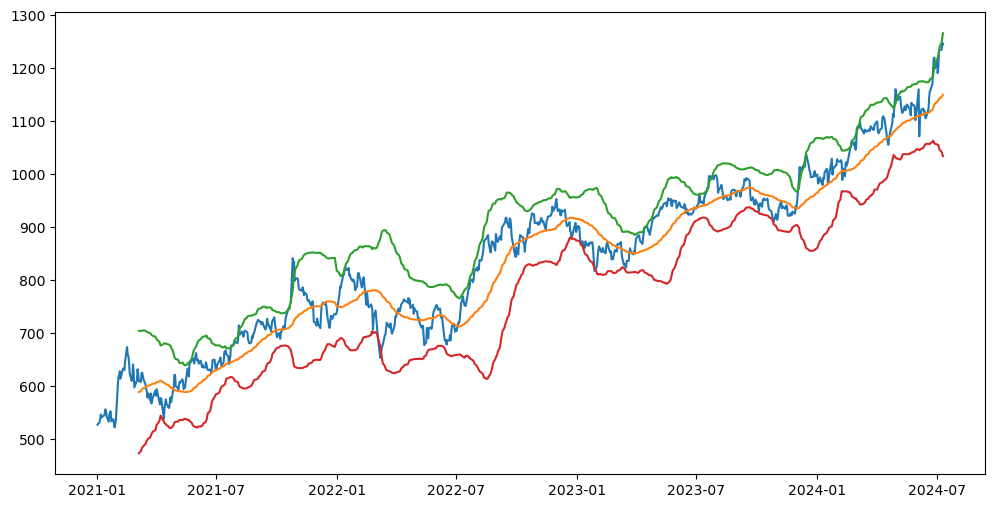

In [98]:
# df = data['Close']
# df = pd.DataFrame(df)
create_bb(data, 'ICICIBANK')

Weekly returns

In [99]:

def create_monthly_return(df,ticker):
    weekly_data = data['Close'].resample('W', label='left').ffill().pct_change()*100
    plt.figure(figsize=(12,4))
    plt.plot(weekly_data)
    plt.axhline(0, color = 'red')
    plt.axhline(np.mean(weekly_data) + np.std(weekly_data), color='purple', linewidth=2);
    plt.axhline(np.mean(weekly_data) - np.std(weekly_data), color='green', linewidth=2);
    plt.axhline(np.mean(weekly_data) + 2* np.std(weekly_data), color='purple');
    plt.axhline(np.mean(weekly_data) - 2*np.std(weekly_data), color='green')
    # return fig
    plt.savefig(f"../MONTHLY_RETURN/{ticker}.png")

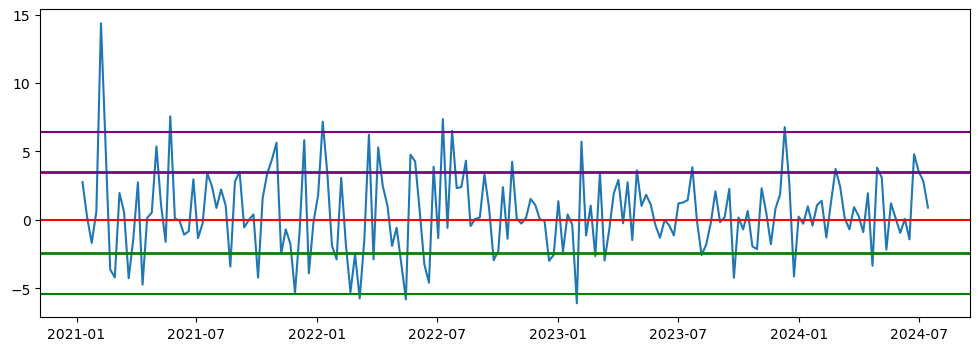

In [100]:
create_monthly_return(data, "ICICBANK")

Linear Regression

In [101]:
def create_LR(df,ticker):
    y = np.array(data['Close'])
    X = pd.to_datetime(data['Close'].index).map(dt.datetime.toordinal)
    X = np.array(X)
    intercept, slope = np.polynomial.polynomial.polyfit(X, y, deg =1)
    # fig = go.Figure()
    # fig.add_trace(go.Scatter(x=X,y=y,mode = 'lines',name = 'Close'))
    # fig.add_trace(go.Scatter(x=X,y=slope*X+intercept, mode = 'lines',line=dict(color='Red'), name= "RegressionLine"))
    # fig.update_layout(autosize=True,width=1000,height=400)
    # # return fig
    # fig.write_image("../LR/test.png")
    plt.figure(figsize=(12,4))
    plt.plot(X,y)
    plt.plot(X,slope*X+intercept)
    plt.savefig(f"../LR/{ticker}.png")

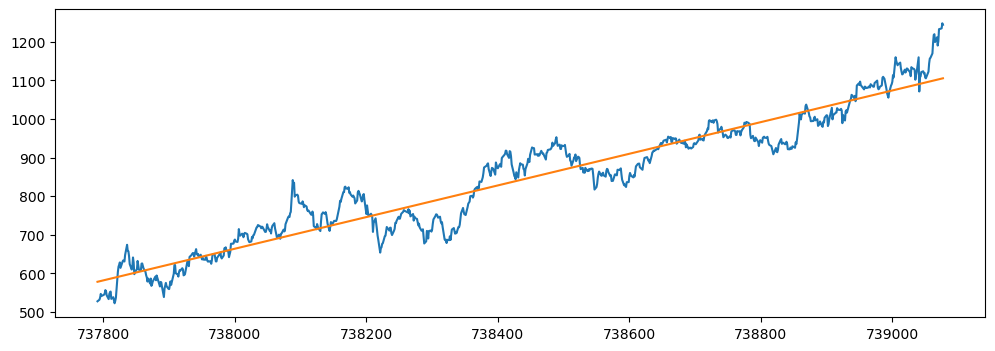

In [102]:
create_LR(data, 'ICICIBANK')

In [103]:
def return_seasonality(data, ticker):
    '''This return the monthly return of the ticker
    '''
    data = data['Close'].resample("M").ffill().pct_change()
    data = pd.DataFrame(data)
    data['date'] = data.index
    # print(data['date'])
    data['year'] = data.index.year
    
    new_df = pd.DataFrame()
    for value in data['year'].unique():
        # print(value)
        new_df[str(value)] = pd.Series(data[data['year']==value]['Close'].values)
        value+=1

        new_df = new_df.dropna()
    # return px.line(new_df)
    # fig = px.line(new_df)
    # fig.write_image("../SEASONALITY/test.png")
    plt.figure(figsize=(12,4))
    plt.plot(new_df)
    plt.legend(new_df, loc='best')
    # plt.plot(X,slope*X+intercept)
    # plt.savefig("../LR/test.png")
    plt.savefig(f"../SEASONALITY/{ticker}.png");

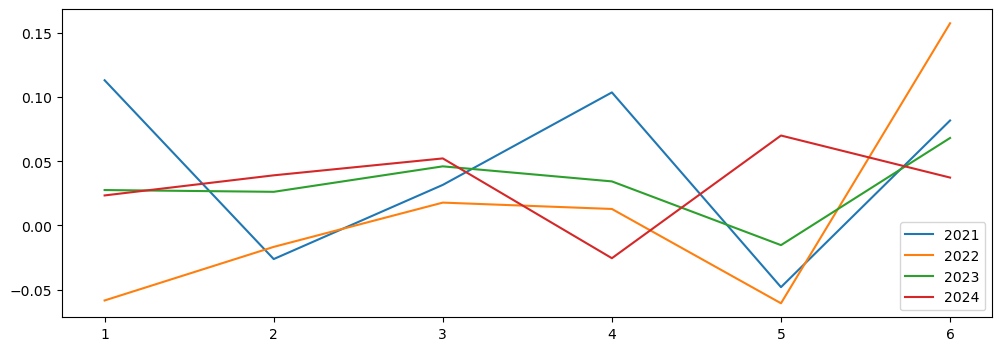

In [104]:
# px.line(return_seasonality(data))
return_seasonality(data,'ICICIBANK');

In [139]:
def calculate_rsi(ticker,prices, window=14):
    """
    Calculate the Relative Strength Index (RSI) for given prices.

    Parameters:
    - prices: List or numpy array of prices.
    - window: Window length for RSI calculation (default is 14).

    Returns:
    - rsi: Numpy array of RSI values.
    """
    prices = prices['Close']
    deltas = np.diff(prices)
    seed = deltas[:window+1]
    up = seed[seed >= 0].sum() / window
    down = -seed[seed < 0].sum() / window
    rs = up / down
    rsi = np.zeros_like(prices)
    rsi[:window] = 100. - 100. / (1. + rs)

    for i in range(window, len(prices)):
        delta = deltas[i - 1]

        if delta > 0:
            gain = delta
            loss = 0.
        else:
            gain = 0.
            loss = -delta

        up = (up * (window - 1) + gain) / window
        down = (down * (window - 1) + loss) / window

        rs = up / down
        rsi[i] = 100. - 100. / (1. + rs)
    plt.figure(figsize=(12,6))
    plt.axhline(80)
    plt.axhline(50, lw = 2)
    plt.axhline(20)
    plt.plot(rsi)
    plt.savefig(f"../RSI/{ticker}.png");

In [140]:
df = data['Close']

In [141]:
calculate_rsi('stock',df)

KeyError: 'Close'

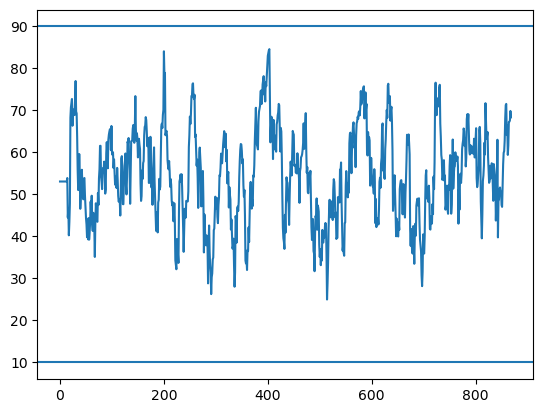

In [117]:
plt.plot(calculate_rsi(df))
plt.axhline(90)
plt.axhline(10)